# Alternative projection

In [1]:
# Getting all the required library
# using JuMP
# using GLPK
using Plots

In [2]:
# Create the vander function for creating a form of representing the vectors and calculations
vander(t,n) = hcat([t.^i for i = 0:n-1]...)

vander (generic function with 1 method)

In [52]:
# Setting the parameters
T=1:0.01:5 # Interpolation points, note it has to be different from 0 so it's best to pick from 1
(n, m) = (5, 6) # The power of the 2 poly in the rational functions
hy_space_sz = n+m+2
# N = 10
# c = rand(N)
# f(t) = sum([c[i]*sin(π*i*(t+0.25)) for i in 1:N]) # Function to approximate

f(t) = (t^3+3)/(t^2 + 1) #function simple to test

f (generic function with 1 method)

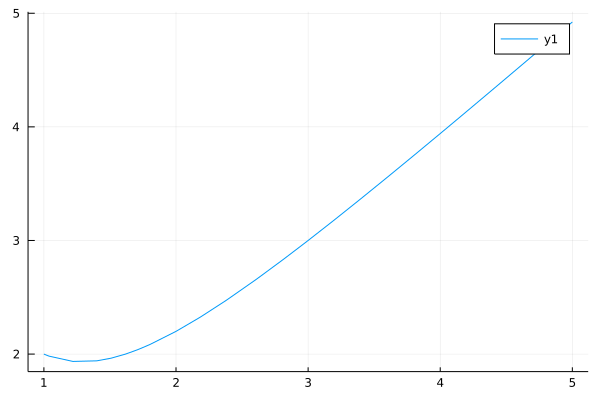

In [53]:
# plot the f to see
plot(f,1,5)

In [54]:
# we are creating hyperplanes by thinking f(x) = p(x)/q(x)
# or converting to <A, xn> - f(x)<B, xm> = 0 with A, B is correspondingly coe of p(x) and q(x) and are the keys
# xn and xm are the vectors which will represent the fucntions
# for easy calculation combining A and B into a big vector so it would be: <A to B, xn to -f(x)xm> = 0
# this is a hyperplan formula with d = 0
# therefore, xn to -f(x)xm is the vector of the hyperplane in R n+m+2 space

# function to calculate the distince between a point and the hyperplane with the sign
function calculateDisAndPoint(check_value, the_point, n, m)
    hy_space_sz = n + m + 2
    xn = vander(check_value, n+1)
    xm = vander(check_value, m+1)
    big_vect = hcat(xn, -f(check_value)*xm)
#     calculate distance by |vect.start_point + d|/||vect|| , d is 0 in this case
    a = sum(hcat([the_point[i]*big_vect[i] for i in 1:hy_space_sz]...))
    b = sum(hcat([big_vect[i]*big_vect[i] for i in 1:hy_space_sz]...))
    c = sqrt(b)
    dis = a/c
#     calculate lambda in x - x0 = lambda.vect to calculate the projectpoint
    lambd = a/b
    x0 = the_point - (lambd * big_vect)
    return dis, x0
end

calculateDisAndPoint (generic function with 1 method)

In [55]:
#function to calculate the distance between 2 points
function distanceBetween(p1, p2)
    sz = size(p1)[2]
    p = p2 - p1
    result = sqrt(sum(hcat([p[i]*p[i] for i in 1:sz]...)))
    return result
end

distanceBetween (generic function with 1 method)

In [90]:
# iterate after a certain times and store the value in a array of the size of number of hyperplanes
num_hy = size(T)[1]
pointA = Array{Array{Float64}}(undef, 1, num_hy)

# pointB = Array{Array{Float64}}(undef, 1, num_hy)
error_rate = 0.0001

s_p = vander(1, hy_space_sz)
need_to_cal = true
count = 0

while true
    for i in 1:num_hy
        result = calculateDisAndPoint(T[i],s_p,n,m)
        if isassigned(pointA, i)
            if need_to_cal
                if distanceBetween(result[2], pointA[i]) > error_rate
                    need_to_cal = false
                end
            end
        else
            need_to_cal = false
        end
        pointA[i] = result[2]
        s_p = result[2]
    end
    count += 1
    if need_to_cal
        break
    else
        need_to_cal = true
    end
end

println("the number of iteration: ", count)

the number of iteration: 3286


In [91]:
# calculate the mid point
mid_p = sum(pointA)/num_hy

1×13 Array{Float64,2}:
 1.39005  1.28872  1.11376  0.904659  …  0.875844  0.159293  -0.0224577

In [92]:
for i in mid_p
    println(i)
end

1.3900493960730278
1.2887174994071842
1.113764988662718
0.9046589864376504
0.7994232703878856
1.1110750375330771
0.25340657888143064
0.41077970451353113
0.6717862464617375
0.9236445268770321
0.8758437500171119
0.15929290633767398
-0.022457698477120536


In [93]:
# we now have the final results
p(t) = sum((t^(i-1))*mid_p[i] for i in 1:(n+1))
q(t) = sum((t^(i-1))*mid_p[i+n+1] for i in 1:(m+1))
g(t) = p(t)/q(t)

g (generic function with 1 method)

In [94]:
g(1.2)

1.9295184778492638

In [95]:
f(1.2)

1.9377049180327868

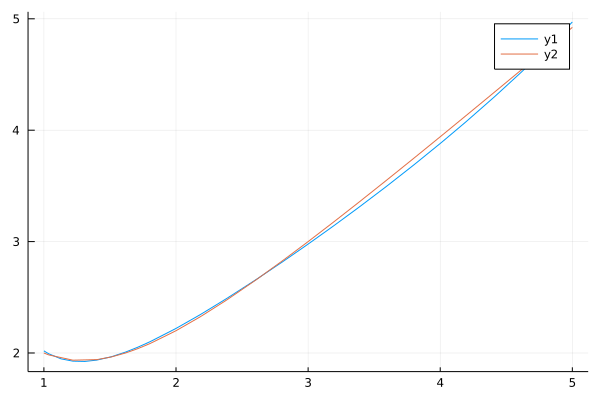

In [96]:
plot(g,1,5)
plot!(f,1,5)

In [97]:
# Find the points of extreme deviation:

σ(t) = g(t) - f(t)
Tmax = maximum(abs.(σ.(T)))
T⁺ = T[findall(t -> σ(t) ≈ Tmax, T)]
T⁻ = T[findall(t -> σ(t) ≈ -Tmax, T)]

1-element Array{Float64,1}:
 3.92

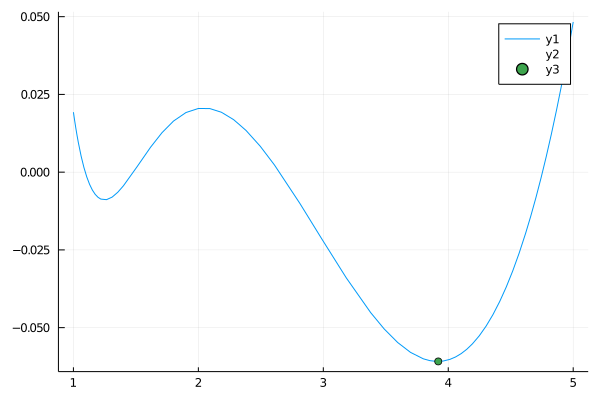

In [98]:
plot(σ,1,5)
scatter!(T⁺,σ.(T⁺))
scatter!(T⁻,σ.(T⁻))